In [30]:
%pip install numpy
%pip install pandas
%pip install scikit-learn
%pip install matplotlib
%pip install seaborn
%pip install gower


[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: pip3.9 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: pip3.9 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: pip3.9 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: pip3.9 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: pip3.9 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: pip

In [31]:
import numpy as np
import gower
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [3]:
df = pd.read_csv('Datasets/student-performance-dataset.csv')

In [4]:
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [5]:
df.info

<bound method DataFrame.info of       StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0          1001   17       1          0                  2        19.833723   
1          1002   18       0          0                  1        15.408756   
2          1003   15       0          2                  3         4.210570   
3          1004   17       1          0                  3        10.028829   
4          1005   17       1          0                  2         4.672495   
...         ...  ...     ...        ...                ...              ...   
2387       3388   18       1          0                  3        10.680555   
2388       3389   17       0          0                  1         7.583217   
2389       3390   16       1          0                  2         6.805500   
2390       3391   16       1          1                  0        12.416653   
2391       3392   16       1          0                  2        17.819907   

      Absences  Tut

In [6]:
# low = 1%     100 rows
# medium = 5%  500 rows
# high = 10%   1000 rows

In [7]:
# Point anomaly generation 30%
# Contextual anomaly generation 70%

In [8]:
# Point anomaly generation
# IQR
# Z-Scores
# Boxplots
# Histogram

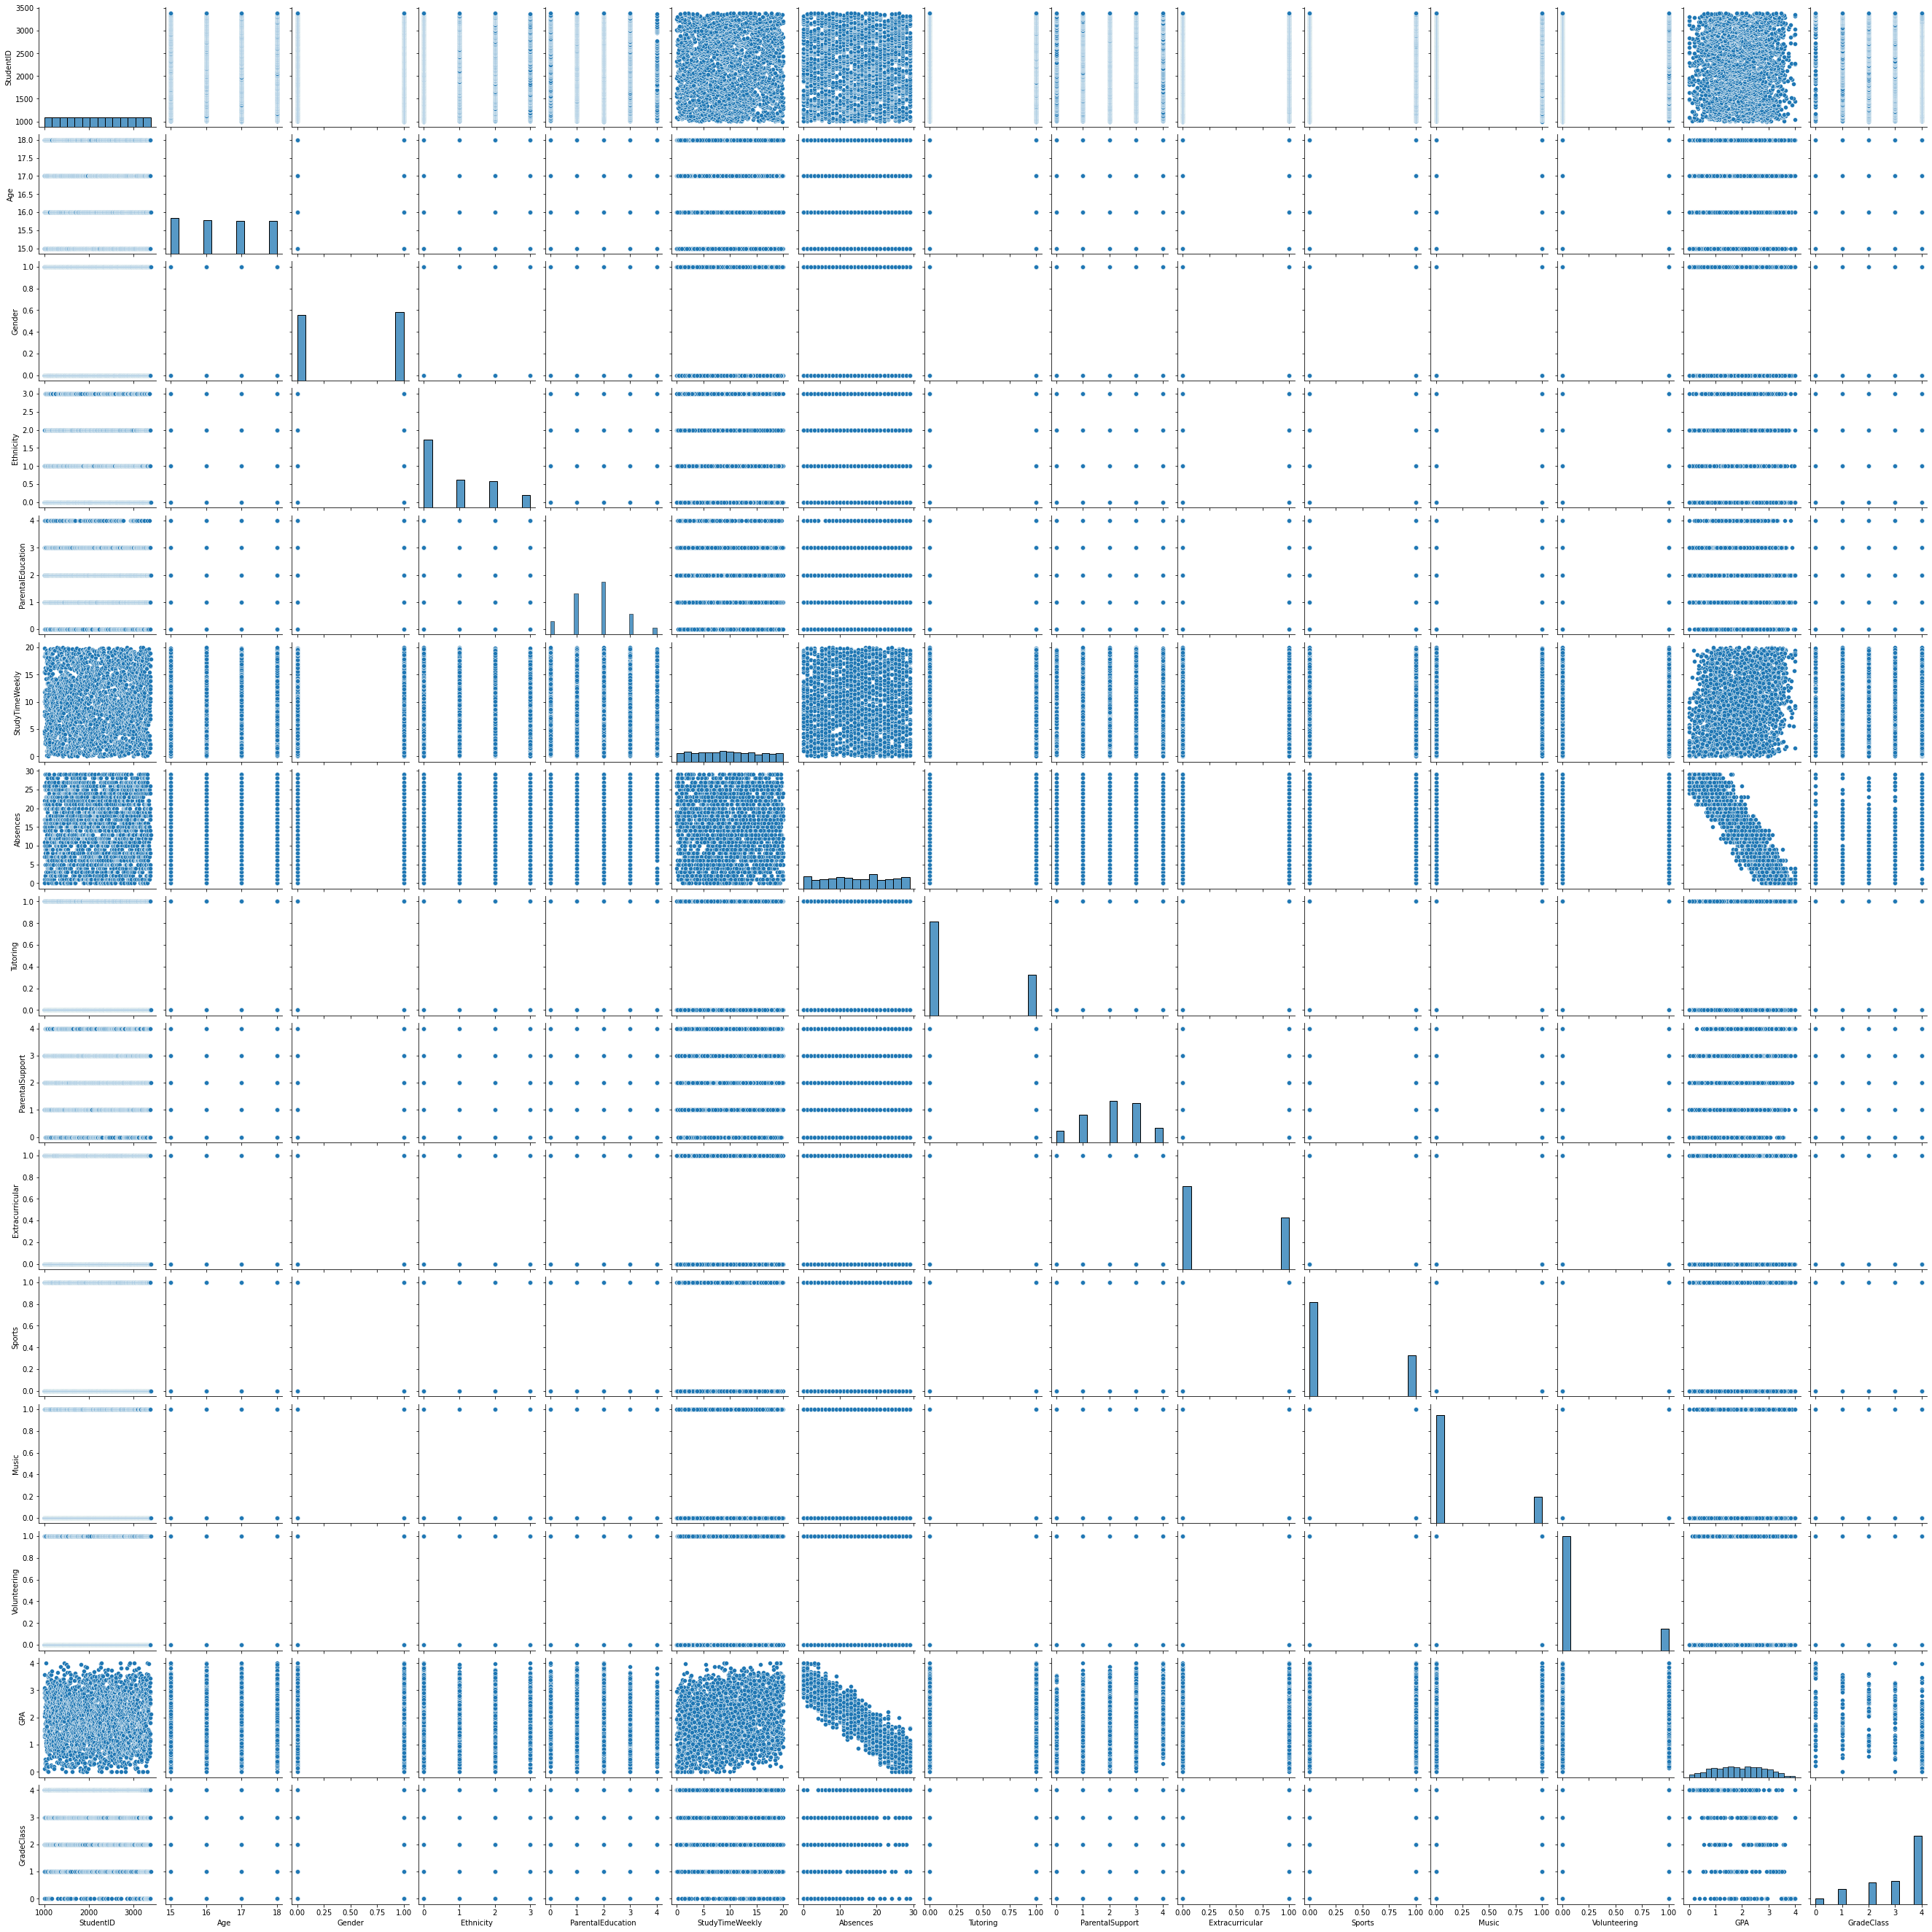

In [9]:
df_float = df.select_dtypes(include=['float64', 'int64'])
sns.pairplot(df_float)

cluster
 1     1097
 3      358
-1      307
 0      303
 6      108
 4       75
 2       57
 8       23
 7       17
 5       12
 12      10
 9       10
 11       8
 10       7
Name: count, dtype: int64


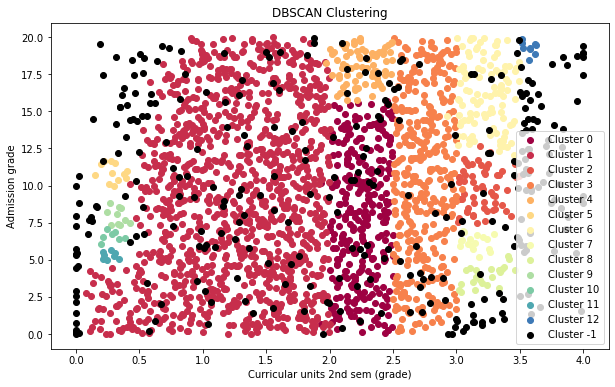

   StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17         1                3                0       0      0   

   Volunteering       GPA  GradeClass  cluster  
0             0  2.929196         2.0        3  


In [10]:
numerical_cols = df.select_dtypes(include=['float64']).columns
numerical_data = df[numerical_cols]

# Standardize the data (important for DBSCAN)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# DBSCAN parameters
eps = 0.16  # Maximum distance for two samples to be considered as in the same neighborhood
min_samples = 10  # Minimum number of samples for a point to be considered as a core point

# Run DBSCAN
db = DBSCAN(eps=eps, min_samples=min_samples)
df['cluster'] = db.fit_predict(scaled_data)

# Check how many points belong to each cluster (including noise)
print(df['cluster'].value_counts())

# Visualize the clustering results using the 'Curricular units 2nd sem (grade)' and 'Admission grade' columns
plt.figure(figsize=(10, 6))

# Define unique labels and their associated colors
unique_labels = set(df['cluster'])
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

# Plot each cluster with a distinct color
for label, color in zip(unique_labels, colors):
    if label == -1:
        # Noise points (DBSCAN labels them as -1)
        color = 'k'  # Black for noise
    cluster_data = df[df['cluster'] == label]
    plt.scatter(cluster_data['GPA'], 
                cluster_data['StudyTimeWeekly'], 
                color=color, label=f"Cluster {label}")

# Add plot title and labels
plt.title("DBSCAN Clustering")
plt.xlabel('Curricular units 2nd sem (grade)')  # X-axis label
plt.ylabel('Admission grade')  # Y-axis label
plt.legend()
plt.show()

# Display the resulting DataFrame with clusters
print(df.head())

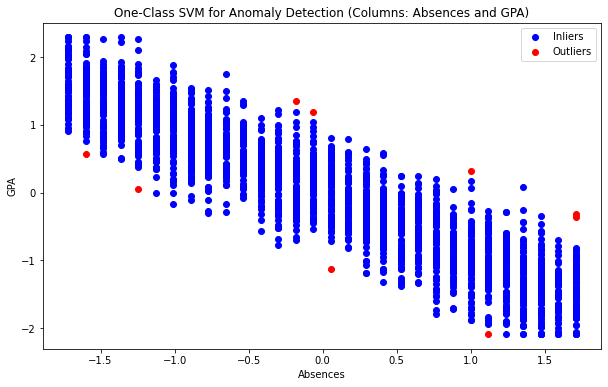

Predictions (1: inlier, -1: outlier): [1 1 1 1 1 1 1 1 1 1]


In [11]:
# Define the columns you want to use for the SVM (e.g., 'Feature1' and 'Feature2')
x_column = 'Absences'
y_column = 'GPA'

# Extract the selected columns
X = df[[x_column, y_column]]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit the One-Class SVM model
model = OneClassSVM(nu=0.005, kernel="rbf", gamma="scale")
model.fit(X_scaled)

# Predict anomalies (1: inliers, -1: outliers)
y_pred = model.predict(X_scaled)

# Visualize the results
plt.figure(figsize=(10, 6))

# Inliers (predicted as 1)
plt.scatter(X_scaled[y_pred == 1, 0], X_scaled[y_pred == 1, 1], color='blue', label='Inliers')

# Outliers (predicted as -1)
plt.scatter(X_scaled[y_pred == -1, 0], X_scaled[y_pred == -1, 1], color='red', label='Outliers')

plt.title(f"One-Class SVM for Anomaly Detection (Columns: {x_column} and {y_column})")
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.legend()
plt.show()

# Show the predictions for the first few points
print("Predictions (1: inlier, -1: outlier):", y_pred[:10])

In [96]:
numerical_columns = ['Tutoring','GPA', 'Absences', 'Gender', 'Ethnicity',
                                    'ParentalEducation', 'StudyTimeWeekly', 'ParentalSupport',
                                    'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GradeClass']
numerical_data = df[numerical_columns]

# Standardize the data for DBSCAN
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# Apply DBSCAN
dbscan = DBSCAN(eps=4, min_samples=5)  # Initial parameters, can be adjusted
dbscan_labels = dbscan.fit_predict(scaled_data)

# Add DBSCAN labels to the original data
df['dbscan_label'] = dbscan_labels

# Filter rows considered anomalous (label == -1)
anomalous_data = df[df['dbscan_label'] == -1]

# Display the anomalous rows
print(anomalous_data)

Empty DataFrame
Columns: [StudentID, Age, Gender, Ethnicity, ParentalEducation, StudyTimeWeekly, Absences, Tutoring, ParentalSupport, Extracurricular, Sports, Music, Volunteering, GPA, GradeClass, cluster, dbscan_label]
Index: []


In [13]:
# Select numerical columns for anomaly detection
numerical_columns = ['credit_score', 'age', 'tenure', 'balance', 
                     'products_number', 'credit_card', 
                     'active_member', 'estimated_salary']
numerical_data = df[numerical_columns]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# Apply One-Class SVM
svm_model = OneClassSVM(kernel='rbf', gamma='scale', nu=0.001)  # Adjust nu as needed
svm_labels = svm_model.fit_predict(scaled_data)

# Add SVM labels to the original data
df['svm_label'] = svm_labels

# Filter rows considered anomalous (label == -1)
anomalous_data_svm = df[df['svm_label'] == -1]

# Display the anomalous rows
print(anomalous_data_svm)

KeyError: "None of [Index(['credit_score', 'age', 'tenure', 'balance', 'products_number',\n       'credit_card', 'active_member', 'estimated_salary'],\n      dtype='object')] are in the [columns]"

In [92]:
class DB:
    def __init__(self, eps=1.0, minPts=5, metric='euclidean'):
        self.eps = eps
        self.minPts = minPts
        self.metric = metric
        
    def fit(self, dataframe):
        self.labels = np.zeros(len(dataframe), dtype=int) - 1
        self.clusters = []
        cid = 0
        for x in range(len(dataframe)):
            if self.labels[x] == -1:
                neighbours = self.get_neighbours(dataframe, x)
                if len(neighbours) < self.minPts:
                    self.labels[x] = 0
                else:
                    cid += 1
                    self.clusters.append([x])
                    self.labels[x] = cid
                    for y in neighbours:
                        if self.labels[y] == -1:
                            self.labels[y] = cid
                            self.clusters[cid-1].append(y)
                            neighbours2 = self.get_neighbours(dataframe, y)
                            if len(neighbours2) >= self.minPts:
                                neighbours += list(set(neighbours2) - set(neighbours))
                        elif self.labels[y] == 0:
                            self.labels[y] = cid
                            self.clusters[cid-1].append(y)
        return self.clusters

    def get_neighbours(self, dataframe, x):
        neighbours = set()
        for y in range(len(dataframe)):
            if self.distance(dataframe[x], dataframe[y]) <= self.eps:
                neighbours.add(y)
        return list(neighbours)
    
    def distance(self, x123, y123):
        return np.sqrt(np.sum((x123-y123)**2))
                           

    def plot(self, data):
        # Create a 3D plot
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')

        # Find noise points and clusters
        noise_idx = np.where(self.labels == 0)[0]
        cluster_idxs = [np.array(c) for c in self.clusters]

        # Assign colors to clusters
        colors = cm.rainbow(np.linspace(0, 1, len(self.clusters) + 1))

        # Plot each cluster
        for i, cluster_idx in enumerate(cluster_idxs):
            ax.scatter(data[cluster_idx, 0], data[cluster_idx, 1], data[cluster_idx, 2], 
                       color=colors[i], s=10, label=f'Cluster {i + 1}')

        # Plot noise points
        if len(noise_idx) > 0:
            ax.scatter(data[noise_idx, 0], data[noise_idx, 1], data[noise_idx, 2], 
                       color='black', s=10, label='Noise')

        # Add labels and legend
        ax.set_title("3D DBSCAN Clustering")
        ax.set_xlabel("Feature 1")
        ax.set_ylabel("Feature 2")
        ax.set_zlabel("Feature 3")
        ax.legend()
        plt.show()


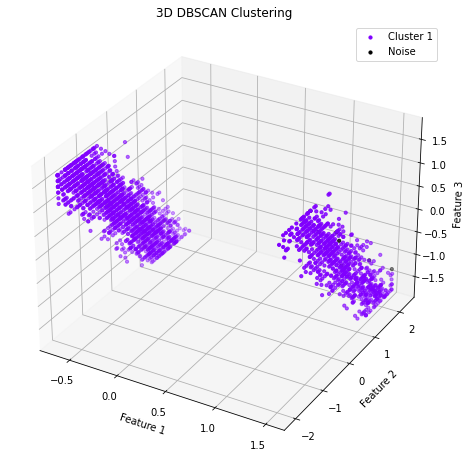

Noise points:
15
Point 101: [-0.65686997  0.67757365 -1.00894683  0.97849211 -0.85339088  1.25350942
 -1.39445033  0.78206265  1.2682689  -0.66013204  2.01954358  2.31553495
 -0.79738659]
Point 638: [ 1.52237132 -0.68618975  1.11729343 -1.02198065 -0.85339088  2.25330753
 -0.91542773 -0.10874395 -0.78847633  1.51484845  2.01954358  2.31553495
  0.82381929]
Point 675: [-0.65686997 -0.69748886  1.23541789 -1.02198065  2.06415697  2.25330753
  0.74099778 -0.10874395 -0.78847633  1.51484845  2.01954358  2.31553495
  0.82381929]
Point 786: [ 1.52237132 -0.02146947  0.76292005 -1.02198065  1.09164102  2.25330753
 -1.27263488  0.78206265  1.2682689  -0.66013204  2.01954358  2.31553495
  0.82381929]
Point 1004: [-0.65686997 -0.52292949  0.29042222  0.97849211  1.09164102  2.25330753
 -1.70504657 -0.10874395 -0.78847633  1.51484845  2.01954358  2.31553495
  0.82381929]
Point 1099: [-0.65686997  1.36380913 -1.00894683 -1.02198065  0.11912507  2.25330753
  0.89745116 -0.99955054 -0.78847633  1.51

In [94]:
scaler = StandardScaler()
dataframe = scaler.fit_transform(df[['Tutoring','GPA', 'Absences', 'Gender', 'Ethnicity',
                                    'ParentalEducation', 'StudyTimeWeekly', 'ParentalSupport',
                                    'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GradeClass']])
db = DB(3, 5)
db.fit(dataframe)
db.plot(dataframe)
noise_indices = np.where(db.labels == 0)[0]

# Print each noise point
print("Noise points:")
print(len(noise_indices))
for idx in noise_indices:
    print(f"Point {idx}: {dataframe[idx]}")

In [80]:
import numpy as np
import pandas as pd
import gower
import matplotlib.pyplot as plt
from matplotlib import cm

class DB:
    def __init__(self, eps=1.0, minPts=5, metric='gower'):
        self.eps = eps
        self.minPts = minPts
        self.metric = metric
        
    def fit(self, dataframe):
        self.labels = np.zeros(len(dataframe), dtype=int) - 1
        self.clusters = []
        cid = 0
        
        # Compute Gower distance matrix for the entire dataset
        self.gower_dist_matrix = gower.gower_matrix(dataframe)
        row_sums = np.sum(gower_dist_matrix, axis=1)

        # Divide the summed values by the number of rows (which is the same as the number of columns)
        average_row_sum = row_sums / (gower_dist_matrix.shape[0] - 1)
        
        for x in range(len(dataframe)):
            if self.labels[x] == -1:
                neighbours = self.get_neighbours(x)
                if len(neighbours) < self.minPts:
                    self.labels[x] = 0  # Mark as noise
                else:
                    cid += 1
                    self.clusters.append([x])
                    self.labels[x] = cid
                    for y in neighbours:
                        if self.labels[y] == -1:
                            self.labels[y] = cid
                            self.clusters[cid-1].append(y)
                            neighbours2 = self.get_neighbours(y)
                            if len(neighbours2) >= self.minPts:
                                neighbours += list(set(neighbours2) - set(neighbours))
                        elif self.labels[y] == 0:
                            self.labels[y] = cid
                            self.clusters[cid-1].append(y)
        return self.clusters

    def get_neighbours(self, x):
        neighbours = set()
        for y in range(len(self.gower_dist_matrix)):
            if self.gower_dist_matrix[x, y] >= self.eps:
                neighbours.add(y)
        return list(neighbours)
    
    def distance(self, x, y):
        # Return the Gower distance between row x and y from the precomputed distance matrix
        return self.gower_dist_matrix[x, y]

    def plot(self, data):
        # Create a 3D plot
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')

        # Find noise points and clusters
        noise_idx = np.where(self.labels == 0)[0]
        cluster_idxs = [np.array(c) for c in self.clusters]

        # Assign colors to clusters
        colors = cm.rainbow(np.linspace(0, 1, len(self.clusters) + 1))

        # Plot each cluster
        for i, cluster_idx in enumerate(cluster_idxs):
            ax.scatter(data[cluster_idx, 0], data[cluster_idx, 1], data[cluster_idx, 2], 
                       color=colors[i], s=10, label=f'Cluster {i + 1}')

        # Plot noise points
        if len(noise_idx) > 0:
            ax.scatter(data[noise_idx, 0], data[noise_idx, 1], data[noise_idx, 2], 
                       color='black', s=10, label='Noise')

        # Add labels and legend
        ax.set_title("3D DBSCAN Clustering")
        ax.set_xlabel("Feature 1")
        ax.set_ylabel("Feature 2")
        ax.set_zlabel("Feature 3")
        ax.legend()
        plt.show()


[0.37815192 0.38422942 0.34209833 ... 0.28528908 0.32530883 0.3765316 ]
2392


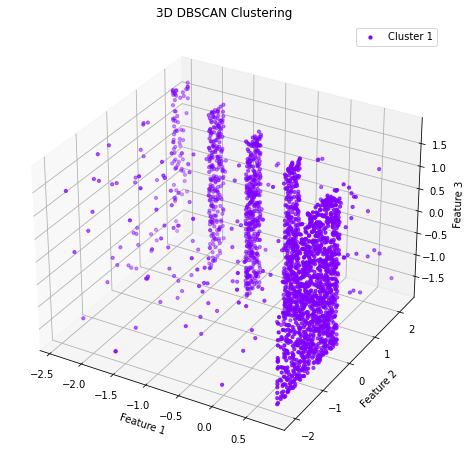

Noise points:
0


In [81]:
scaler = StandardScaler()
dataframe = scaler.fit_transform(df[['GradeClass','GPA', 'StudyTimeWeekly']])
gower_dist_matrix = gower.gower_matrix(dataframe)
row_sums = np.sum(gower_dist_matrix, axis=1)

# Divide the summed values by the number of rows (which is the same as the number of columns)
average_row_sum = row_sums / (gower_dist_matrix.shape[0] - 1)

# Print the result (optional, depending on the size of the data)
print(average_row_sum)
print(len(gower_dist_matrix))
db = DB(0.3, 5)
db.fit(dataframe)
db.plot(dataframe)
noise_indices = np.where(db.labels == 0)[0]

# Print each noise point
print("Noise points:")
print(len(noise_indices))
for idx in noise_indices:
    print(f"Point {idx}: {dataframe[idx]}")


In [74]:
for i in average_row_sum:
    if i > 0.55:
        print(i)

0.5767804
0.5556949
0.5846359
0.56984574
0.5545724
0.5542306
0.5502798
0.55958086
0.57644963
0.55277973
0.55614895
0.5728387
